In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

In [2]:
table_mars = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

In [3]:
mars_df = table_mars[0]
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [4]:
# Months on Mars
mars_months = mars_df["month"].nunique
mars_months

<bound method IndexOpsMixin.nunique of 0       6
1       6
2       6
3       6
4       6
       ..
1862    5
1863    5
1864    5
1865    5
1866    5
Name: month, Length: 1867, dtype: int64>

In [5]:
# Mars days worth of data
mars_days = mars_df["sol"].nunique()
mars_days

1867

In [6]:
# Coldest & warmest months on Mars

temp_by_month = mars_df.groupby(["month"]).mean().reset_index()

cold_month = temp_by_month[temp_by_month.min_temp == temp_by_month.min_temp.min()]['month'].tolist()[0]
warm_month = temp_by_month[temp_by_month.min_temp == temp_by_month.min_temp.max()]['month'].tolist()[0]

print(f"The coldest month on mars is {cold_month} and the warmest month on mars is {warm_month}")

The coldest month on mars is 3 and the warmest month on mars is 8


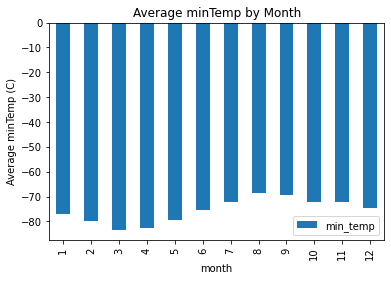

In [7]:
# Plot min_temp by month

temp_by_month.plot(x='month', y='min_temp', kind='bar')
plt.title('Average minTemp by Month')
plt.ylabel('Average minTemp (C)')
plt.show()

In [8]:
# Lowest & highest atmospheric pressure months on Mars

temp_by_month = mars_df.groupby(["month"]).mean().reset_index()

low_month = temp_by_month[temp_by_month.pressure == temp_by_month.pressure.min()]['month'].tolist()[0]
high_month = temp_by_month[temp_by_month.pressure == temp_by_month.pressure.max()]['month'].tolist()[0]

print(f"The month on mars with the lowest atmospheric pressure is {low_month} " \
      f"and month on mars with the highest atmospheric pressure is {high_month}")

The month on mars with the lowest atmospheric pressure is 6 and month on mars with the highest atmospheric pressure is 9


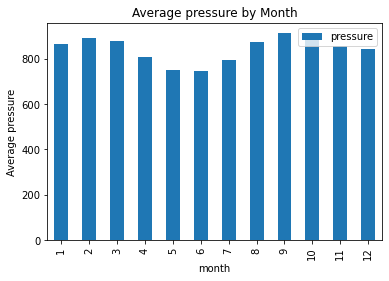

In [9]:
# Plot pressure by month

temp_by_month.plot(x='month', y='pressure', kind='bar')
plt.title('Average pressure by Month')
plt.ylabel('Average pressure')
plt.show()

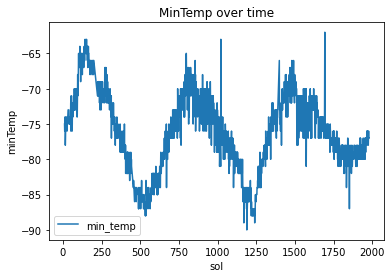

In [10]:
mars_df.plot(x='sol', y='min_temp')
plt.title('MinTemp over time')
plt.ylabel('minTemp')
plt.show()

In [11]:
# Based on the above graph, there are about 700 earth days in a single martian year. 
# The min temp hits a low point around sol 500 and sol 1200, indicating the beginning and end of the weather cycle

In [12]:
mars_df.to_csv('clean_mars_data')